## Exercise 5.01: Advertising

In [7]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [8]:
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


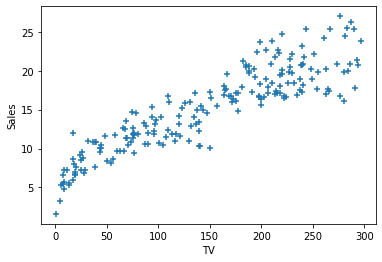

In [9]:
plt.scatter(advertising.TV, advertising.Sales, marker="+")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [10]:
# sns.pairplot(advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')
# plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [12]:
lr.fit(advertising[['TV']], advertising[['Sales']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Plotting the relationship

In [13]:
sales_pred = lr.predict(advertising[['TV']])

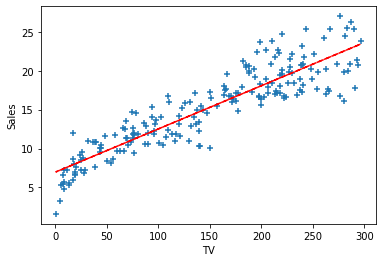

In [14]:
plt.plot(advertising.TV, sales_pred,"r--")
plt.scatter(advertising.TV, advertising.Sales, marker='+')
plt.xlabel("TV")
plt.ylabel('Sales')
plt.show()

## Exercise 5.2: Feature Creation

In [15]:
import pandas as pd
df = pd.read_csv('retail_transactions.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2011-03-16 11:36:00,1.25,18231.0,United Kingdom
1,559898,21868,POTTING SHED TEA MUG,6,2011-07-13 12:18:00,1.25,16225.0,United Kingdom
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-04-01 13:20:00,0.85,12949.0,United Kingdom
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2011-01-09 15:23:00,2.95,14395.0,United Kingdom
4,561390,20726,LUNCH BAG WOODLAND,10,2011-07-27 09:52:00,1.65,17068.0,United Kingdom


In [16]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [17]:
df['revenue'] = df['UnitPrice']*df['Quantity']

In [18]:
operations = {'revenue':'sum',
              'InvoiceDate':'first',
              'CustomerID':'first' 
             }
df = df.groupby('InvoiceNo').agg(operations)

In [19]:
df.head()

,revenue,InvoiceDate,CustomerID
InvoiceNo,,,
536365,139.12,2010-12-01 08:26:00,17850.0
536366,22.20,2010-12-01 08:28:00,17850.0
536367,278.73,2010-12-01 08:34:00,13047.0
536368,70.05,2010-12-01 08:34:00,13047.0
536369,17.85,2010-12-01 08:35:00,13047.0


In [20]:
df['year'] = df['InvoiceDate'].apply(lambda x: x.year)

In [21]:
df['days_since'] = (pd.datetime(year=2010, month=12, day=31) - 
                    df['InvoiceDate']).apply(lambda x: x.days)

C:\Users\mirza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [22]:
operations = {'revenue':'sum',
              'days_since':['max','min','nunique'],
             }

X = df[df['year'] == 2010].groupby('CustomerID').agg(operations)

X.head()

revenue days_since            
                sum        max min nunique
CustomerID                                
12347.0      711.79         23  23       1
12348.0      892.80         14  14       1
12370.0     1868.02         16  13       2
12377.0     1001.52         10  10       1
12383.0      600.72          8   8       1

In [23]:
X.columns = [' '.join(col).strip() for col in X.columns.values]

In [24]:
X.head()

,revenue sum,days_since max,days_since min,days_since nunique
CustomerID,,,,
12347.0,711.79,23,23,1
12348.0,892.80,14,14,1
12370.0,1868.02,16,13,2
12377.0,1001.52,10,10,1
12383.0,600.72,8,8,1


In [25]:
X['avg_order_cost'] = X['revenue sum']/X['days_since nunique']

In [26]:
y = df[df['year'] == 2011].groupby('CustomerID')['revenue'].sum()

In [27]:
wrangled_df = pd.concat([X,y], axis=1)
wrangled_df.columns = ['revenue_2010',
                       'days_since_first_purchase',
                       'days_since_last_purchase',
                       'number_of_purchases',
                       'avg_order_cost',
                       'revenue_2011']

wrangled_df.head()

,revenue_2010,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2011
CustomerID,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,77183.60
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12349.0,NaN,NaN,NaN,NaN,NaN,1757.55
12350.0,NaN,NaN,NaN,NaN,NaN,334.40


In [28]:
wrangled_df = wrangled_df[~wrangled_df.revenue_2010.isnull()]
wrangled_df = wrangled_df[~wrangled_df.revenue_2011.isnull()]

In [29]:
wrangled_df = wrangled_df[wrangled_df.revenue_2011 < ((wrangled_df.revenue_2011.median()) + wrangled_df.revenue_2011.std()*3)]
wrangled_df = wrangled_df[wrangled_df.revenue_2010 < ((wrangled_df.revenue_2010.median()) + wrangled_df.revenue_2010.std()*3)]

In [30]:
wrangled_df.to_csv('wrangled_transactions.csv')
wrangled_df.head()

,revenue_2010,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2011
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


### Exercise 5.3: Associations between predictors and target

In [31]:
df = pd.read_csv('wrangled_transactions.csv', index_col='CustomerID')

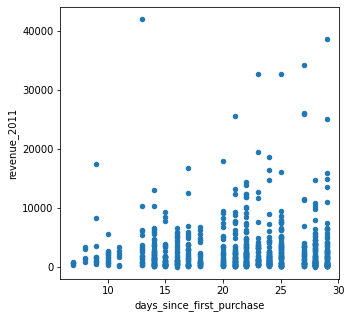

In [32]:
df.plot.scatter(x="days_since_first_purchase", y="revenue_2011",figsize=[5,5])
plt.show()

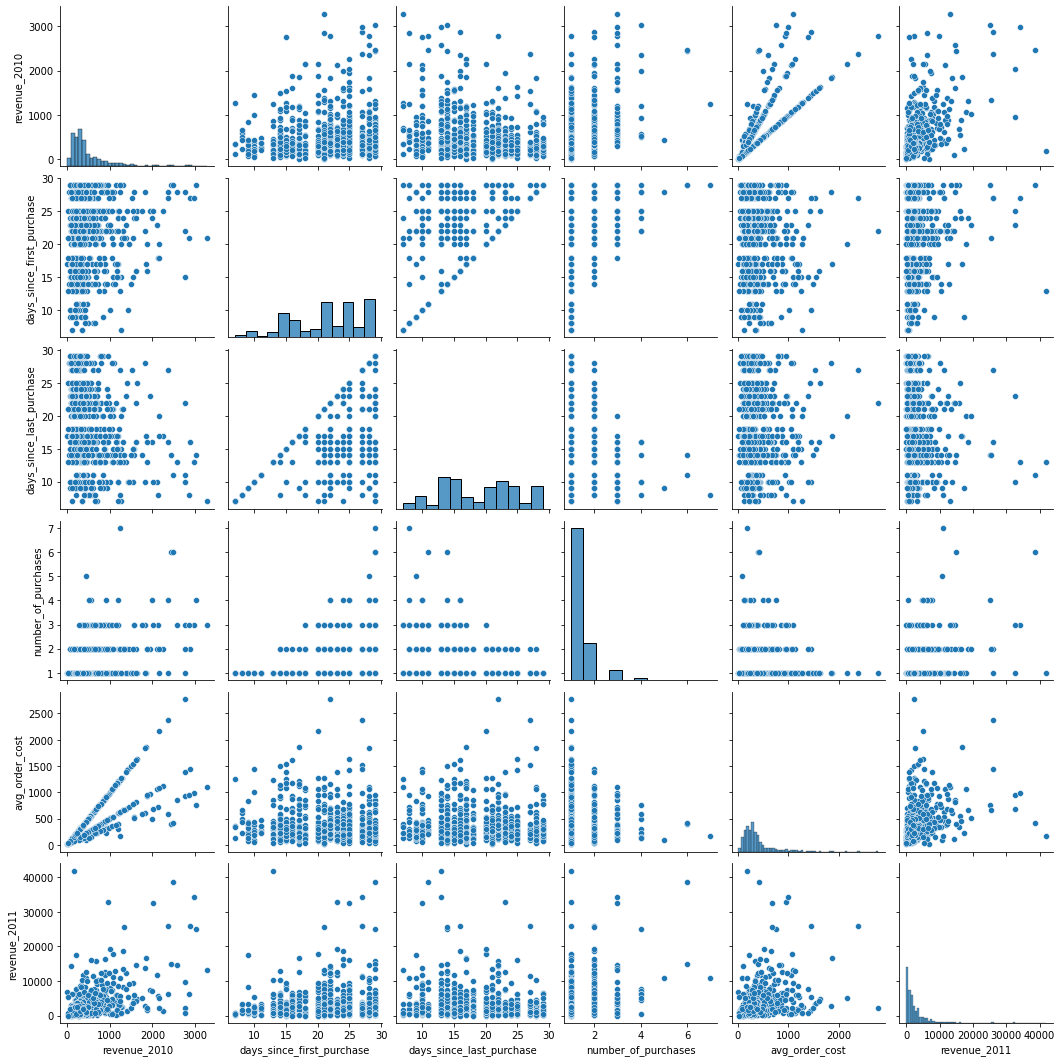

In [33]:
import seaborn as sns
%matplotlib inline

sns.pairplot(df)
plt.show()

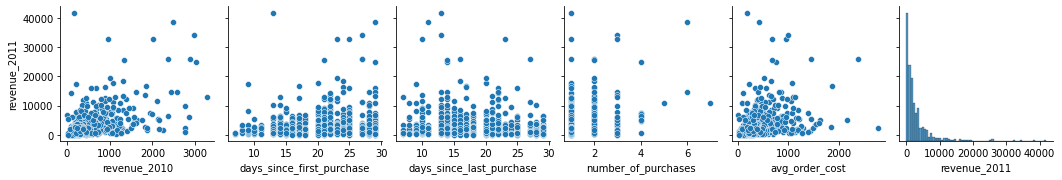

In [34]:
sns.pairplot(df,y_vars="revenue_2011")
plt.show()

In [35]:
df.corr()

,revenue_2010,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2011
revenue_2010,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchases,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
revenue_2011,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


## Exercise 5.4: Building LR model

In [36]:
import pandas as pd
df = pd.read_csv('wrangled_transactions.csv', index_col='CustomerID')

In [37]:
df.corr()

,revenue_2010,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2011
revenue_2010,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchases,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
revenue_2011,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


In [38]:
X = df[['revenue_2010',
       'days_since_last_purchase',
       'number_of_purchases',
       'avg_order_cost'
       ]]
y = df['revenue_2011']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
X_train.columnsmns

Index(['revenue_2010', 'days_since_last_purchase', 'number_of_purchases',
       'avg_order_cost'],
      dtype='object')

In [41]:
model.coef_

array([  5.78799016,   7.47737544, 336.60769871,  -2.0558923 ])

In [42]:
model.intercept_

264.8693265705988

In [44]:
single_customer = pd.DataFrame({
    'revenue_2010': [1000],
    'days_since_last_purchase': [20],
    'number_of_purchases': [2],
    'avg_order_cost': [500]
})

model.predict(single_customer)


array([5847.67624446])

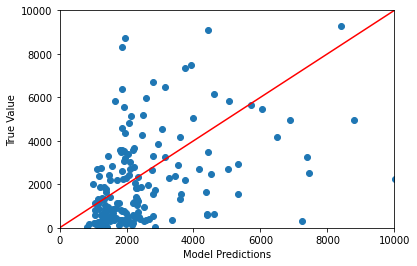

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(model.predict(X_test),y_test)
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.plot([0, 10000], [0, 10000], 'k-', color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()

In [47]:
from scipy.stats.stats import pearsonr

pearsonr(model.predict(X_test),y_test)

(0.6125740076680493, 1.934002067463782e-20)